In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# I did strach goal

In [27]:
class ChessBoard:
    
    def __init__(self):
        self.rowChess=16
        self.colChess=16
        self.Red = [1,0.2,0,0.8]
        self.Blue=[0,1,1,1]
        self.Black = [0,0,0,0.5]
        self.White=[1,1,1,1]
        self.board = np.ones([self.rowChess,self.colChess,4])

    def chess_table(self):
        for i in range(len(self.board)):
          for j in range(len(self.board[i])):
            if j%2 != i%2 :
              self.board[i][j]=self.Black
    def add_red(self, row, col):
        self.board[row,col]=self.Red
    
    def add_blue(self, row, col):
       self.board[row,col]=self.Blue
        
    
    def render(self):
        plt.imshow(self.board)
    
    def is_under_attack(self):
      indexBlue=[]
      indexRed=[]
      blueData = self.where_blue()
      
      for data in blueData:
        index= []
        result = False
        row=int(data[0])
        col=int(data[1])
        for i in np.ndindex(self.rowChess,self.colChess):
          if i[0]==row or i[1]==col or i[0]-i[1]==row-col or i[0]+i[1]==row+col:
            if(all(self.board[i[0],i[1]]== self.Red)):
              result = True
              index.append([i[0],i[1]]) 
        if result:
          indexBlue.append([row,col])
          indexRed.append(index)
      return(self.dangerous(indexBlue,indexRed))
      
      
      
    def where_blue(self):
      result = []
      for i in range(len(self.board)):
          for j in range(len(self.board[i])): 
            if all(self.Blue == self.board[i][j]):
              result.append([i,j])
      return(result)

    def dangerous(self,blue,red):
      if (blue != []):
        return(True)
        # for i in range(len(blue)):
        #   test=red[i]
        #   print(f'element under the dangerous : {blue[i]} from : {red[i]}')
      else:
        # print('there is not under dangerous')
        return(False)

    def checkcolor(self,value):
      value =value.lower()
      color ={'blue':self.Blue,'red':self.Red}
      for i in range(len(self.board)):
          for j in range(len(self.board[i])): 
            if all(color[value] == self.board[i][j]):
              if j%2 != i%2 :
                self.board[i][j]=self.Black
              else:
                self.board[i][j]=self.White



In [28]:

chess_board = ChessBoard()
chess_board.chess_table()

## queen under attack from horizontal


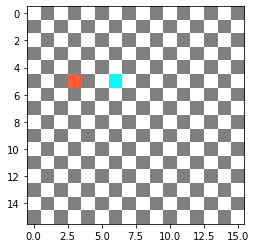

In [29]:

chess_board.add_blue(5,6)
chess_board.add_red(5,3)
chess_board.render()
assert chess_board.is_under_attack() == True

## queen under attack from vertical

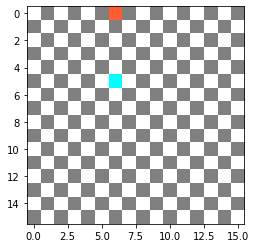

In [30]:
chess_board.checkcolor('red')
chess_board.add_blue(5,6)
chess_board.add_red(0,6)
chess_board.render()
assert chess_board.is_under_attack() == True

## queen under attack from diagonal

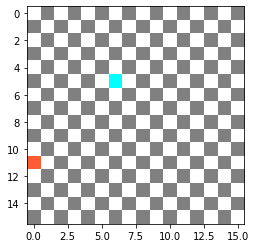

In [31]:
chess_board.checkcolor('red')
chess_board.add_blue(5,6)
chess_board.add_red(11,0)
chess_board.render()
assert chess_board.is_under_attack() == True

## queen not under attack give False

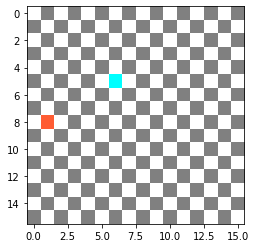

In [33]:
chess_board.checkcolor('red')
chess_board.add_blue(5,6)
chess_board.add_red(8,1)
chess_board.render()
assert chess_board.is_under_attack() == False